In [6]:
import pandas as pd
from datetime import datetime
from fbprophet import Prophet
import holidays

In [2]:
d0 = pd.read_csv("/Users/pranavprajapati/Desktop/Projects_2019/price_prediction/data/databed0.csv")

In [3]:
d0['last_modified']= pd.to_datetime(d0['last_modified'])

In [1]:
#d0.info()
  

In [5]:
d0['last_modified'] = d0['last_modified'].dt.strftime('%Y-%m-%d')

In [6]:
d0['last_modified'].head()

0    2016-01-24
1    2016-01-24
2    2016-01-24
3    2016-01-24
4    2016-01-24
Name: last_modified, dtype: object

In [7]:
d0s = d0[['last_modified','price']]

In [8]:
d0s = d0s.sort_values(by='last_modified')

In [2]:
#d0s.isna().sum()

In [10]:
d0s = d0s.rename(index=str, columns={"last_modified": "ds", "price": "y"})

In [3]:
#d0s.info()


In [25]:
d0s = d0s[d0s.y < 300]

In [4]:
#d0s.info()

In [32]:
m = Prophet(changepoint_prior_scale=0.75)
m.fit(d0s)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
32305,2017-10-21
32306,2017-10-22
32307,2017-10-23
32308,2017-10-24
32309,2017-10-25


In [36]:
forecast = m.predict(future)



,ds,yhat,yhat_lower,yhat_upper
32305,2017-10-21,168.598238,92.319797,246.255135
32306,2017-10-22,168.283153,92.863795,244.305417
32307,2017-10-23,169.670655,101.563380,250.609497
32308,2017-10-24,170.385919,101.276040,249.043932
32309,2017-10-25,171.209724,98.045294,247.195167


In [44]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
32305,2017-10-21,168.598238,92.319797,246.255135
32306,2017-10-22,168.283153,92.863795,244.305417
32307,2017-10-23,169.670655,101.563380,250.609497
32308,2017-10-24,170.385919,101.276040,249.043932
32309,2017-10-25,171.209724,98.045294,247.195167


In [41]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-21,146.843293,81.232450,207.720261
1,2016-01-21,146.843293,82.028488,214.436382
2,2016-01-21,146.843293,83.534834,211.319728
3,2016-01-21,146.843293,81.121421,211.873178
4,2016-01-21,146.843293,85.539775,212.020939


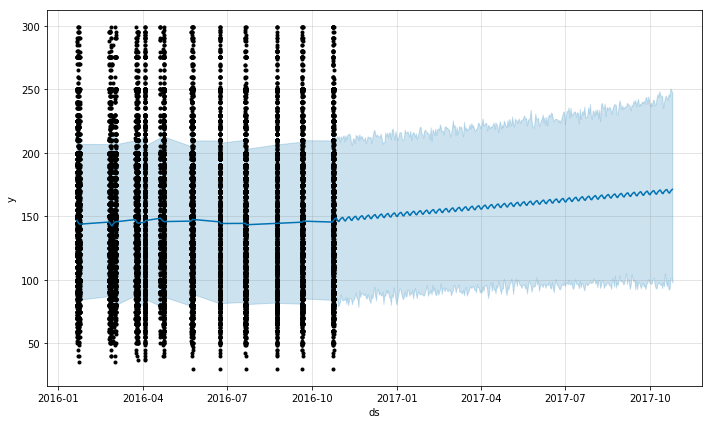

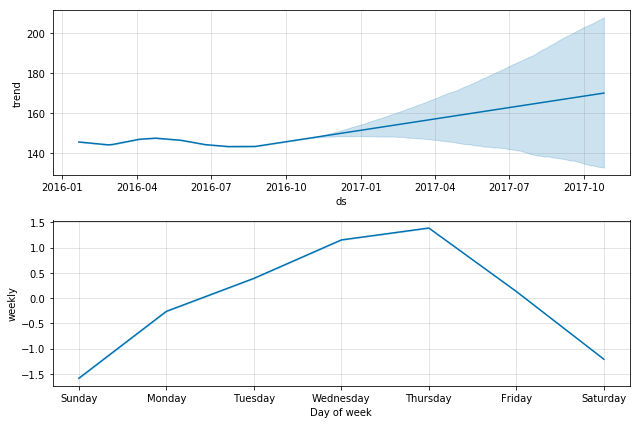

In [37]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)


In [8]:
d1 = pd.read_csv("/Users/pranavprajapati/Desktop/Projects_2019/price_prediction/data/databed2.csv")
d1['last_modified']= pd.to_datetime(d1['last_modified'])
d1['last_modified'].head()
d1['last_modified'] = d1['last_modified'].dt.strftime('%Y-%m-%d')
d1s = d1[['last_modified','price']]
d1s = d1s.sort_values(by='last_modified')
d1s = d1s.rename(index=str, columns={"last_modified": "ds", "price": "y"})

In [20]:
#d1s['y'].describe()


In [17]:
d1s = d1s[d1s.y < 450]

In [18]:
d1s = d1s[d1s.y > 40]

In [19]:
d1s['y'].describe()

count    42410.000000
mean       203.892714
std         82.960968
min         42.000000
25%        140.000000
50%        190.000000
75%        250.000000
max        449.000000
Name: y, dtype: float64

In [22]:
m1 = Prophet(changepoint_prior_scale=0.75)
m1.fit(d1s)
future = m1.make_future_dataframe(periods=365)
future.tail()
forecast = m1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
42770,2017-10-21,215.312568,91.325056,336.588447
42771,2017-10-22,213.996971,95.021439,339.090639
42772,2017-10-23,213.852469,86.841724,334.771328
42773,2017-10-24,215.598682,95.056212,330.688324
42774,2017-10-25,214.898401,92.705502,334.594462


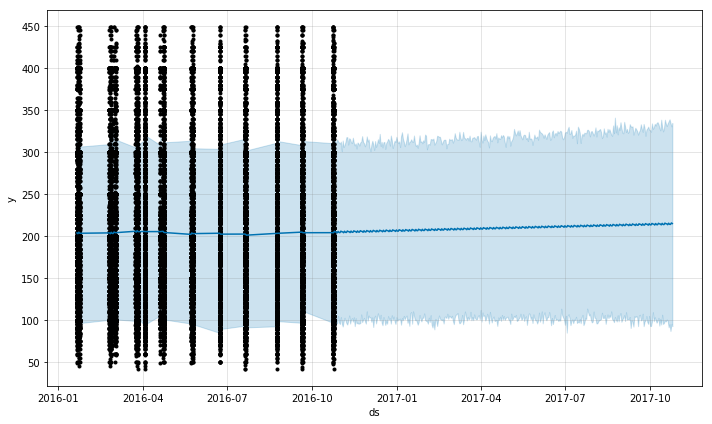

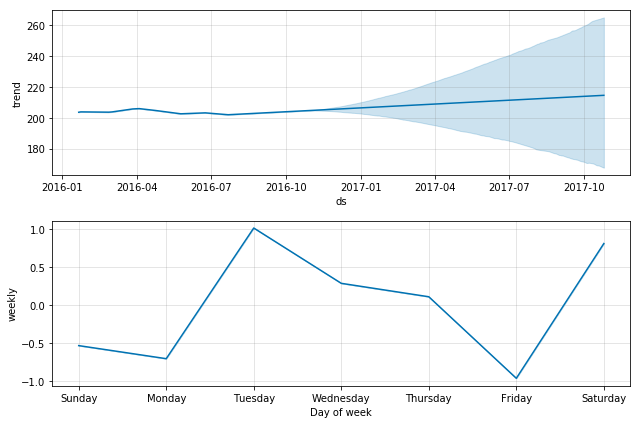

In [24]:
fig1 = m1.plot(forecast)
fig2 = m1.plot_components(forecast)
